In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nltk.download("punkt")  # For tokenization
nltk.download("stopwords")  # For stopwords
nltk.download("wordnet")  # For lemmatization


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aflah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aflah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aflah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
file_path = r"C:\Users\aflah\OneDrive\Desktop\Future Intern Tasks\test.ft.txt"  # Change this to your actual file path

# Read the file and convert it into a DataFrame
with open(file_path, "r", encoding="utf-8") as file:
    reviews = file.readlines()

# Remove empty lines
reviews = [review.strip() for review in reviews if review.strip()]

# Create a DataFrame
df = pd.DataFrame(reviews, columns=["Review"])

# Check if the 'Review' column exists
print("Columns in DataFrame:", df.columns)

Columns in DataFrame: Index(['Review'], dtype='object')


In [4]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Function for text preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^a-z\s]", "", text)  # Remove special characters & numbers
    words = word_tokenize(text)  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization & stopword removal
    return " ".join(words)

# Apply preprocessing
df["Cleaned_Review"] = df["Review"].apply(preprocess_text)

# Ensure 'Cleaned_Review' column is created
print("Columns after preprocessing:", df.columns)
print(df.head())  # Display first few rows

Columns after preprocessing: Index(['Review', 'Cleaned_Review'], dtype='object')
                                              Review  \
0  __label__2 Great CD: My lovely Pat has one of ...   
1  __label__2 One of the best game music soundtra...   
2  __label__1 Batteries died within a year ...: I...   
3  __label__2 works fine, but Maha Energy is bett...   
4  __label__2 Great for the non-audiophile: Revie...   

                                      Cleaned_Review  
0  label great cd lovely pat one great voice gene...  
1  label one best game music soundtrack game didn...  
2  label battery died within year bought charger ...  
3  label work fine maha energy better check maha ...  
4  label great nonaudiophile reviewed quite bit c...  


In [5]:
# Function to analyze sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity  # Ranges from -1 to 1
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
df["Sentiment_Label"] = df["Cleaned_Review"].apply(get_sentiment)

# Display sentiment distribution
print(df["Sentiment_Label"].value_counts())

Sentiment_Label
Positive    302132
Negative     89678
Neutral       8190
Name: count, dtype: int64


C:\Users\aflah\AppData\Local\Temp\ipykernel_45244\2363893562.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Sentiment_Label"], palette="coolwarm")


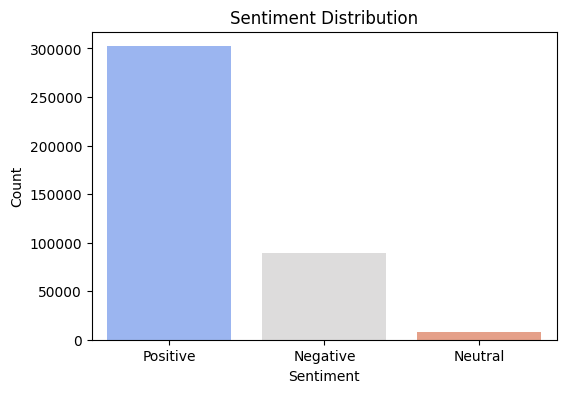

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Sentiment_Label"], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [7]:
df.to_csv("sentiment_analysis_results.csv", index=False)
print("Data saved successfully as sentiment_analysis_results.csv")

Data saved successfully as sentiment_analysis_results.csv
